![title](img/ufpb.jpg)
# <center>Computação Científica com Python - Projeto Final</center>
## <center>Uma estimação do crescimento das taxas de violência contra a mulher no Brasil.</center>
### <center>João Paulo Silva Martins - 20170107286</center>

## 1. Introdução
 
A violência contra a mulher é um problema social, ético e cultural que atinge praticamente toda a população mundial. Somente em 2006 foi promulgada no Brasil, uma lei que tinha como propósito criar métodos de atendimento e segurança para as mulheres, de maneira a evitar qualquer forma de agressão, seja física, verbal, psicológica ou moral. Porém, apesar de a Lei Maria da Penha ter sido extremamente eficaz, o número de casos relatados por ano nas grandes regiões do Brasil continua crescendo gradativamente.

A proposta do projeto tem como principal finalidade apresentar uma estimativa do percentual de crescimento dos casos de agressão para o ano de 2020, utilizando como principal referência, uma base de dados de todos os casos notificados no Distrito Federal durante um período de quatro anos.


## 2. Desenvolvimento

Informações coletadas de grandes meios de entretenimento e jornalismo brasileiros constataram que até o mês de Junho, o número denúncias de agressão domiciliar teria aumentado em torno de 40% devido ao isolamento social induzido pela pandemia do novo Coronavírus.

"*Em abril, quando o isolamento social imposto pela pandemia já durava mais de um mês, a quantidade de denúncias de violência contra a mulher recebidas no canal 180 deu um salto: cresceu quase 40% em relação ao mesmo mês de 2019, segundo dados do Ministério da Mulher, da Família e dos Direitos Humanos (MMDH). Em março, com a quarentena começando a partir da última semana do mês, o número de denúncias tinha avançado quase 18% e, em fevereiro, 13,5%, na mesma base de comparação* (Isto É, Ed. nº 1184 14.08)".

A fim de corroborar essas informações, foi necessário realizar uma análise e amostragem do conjunto de datos a fim de representar o número de casos de violência reportados diariamente no Brasil. Devido as dificuldades em encontrar uma base deveras abrangente, a amostragem foi feita utilizando informações de algumas regiões administrativas do Distrito Federal.

#### 2.1 - Importar as bibliotecas necessárias e carregar as bases de dados no projeto.

##### Bibliotecas utilizadas:

1. **Matplotlib** -- Para a criação de gráficos e visualizações de dados em geral.
2. **Numpy** -- Para realizar operações com arrays e matrizes multidimensionais, já que possui uma larga coleção de funções matemáticas para trabalhar com estas estruturas.
3. **Pandas** -- Já que oferece estruturas e operações para manipular tabelas numéricas e séries temporais (nesse caso, foi utilizada exclusivamente para carregar os dados no programa, devido os mesmos estarem em formato **.xls**).

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

maria_da_penha = pd.read_excel('bases/Maria_da_Penha.xls')

#### 2.2 - Criar vetores representando o número de casos registrados em cada ano, para cada base de dados.

Ao abrir um arquivo utilizando a função ***read_excel***() do pandas, cada coluna é rotulada como "Unnamed:" + o índice de sua posição na tabela, por isso, para que os dados de 2016 fossem acessados, foi necessário utilizar 'Unnamed: 2'.
Como só eram necessários os valores, sem os títulos e subtítulos das colunas, os vetores foram criados limitando os dados, a partir do índice 2 (ou seja, as linhas referentes aos títulos), até o índice -1 da coluna, eliminando o valor total da sua soma.

In [5]:
mar_2016 = np.array(maria_da_penha['Unnamed: 2'][2:-1])
mar_2017 = np.array(maria_da_penha['Unnamed: 3'][2:-1])
mar_2018 = np.array(maria_da_penha['Unnamed: 4'][2:-1])
mar_2019 = np.array(maria_da_penha['Unnamed: 5'][2:-1])

#### 2.3 - Plotagem do gráfico comparando o número de casos relatados com uma diferença de 3 anos.

O gráfico a seguir apresenta a diferença do cenário desde o primeiro ano analisado até o último. Em regiões menores, como o Jardim Botânico ou Park Way não há tanta variação do número de casos, já nas regiões maiores, como Ceilândia, pode-se observar que essas taxas tem um crescimento drástico, ao se comparar os dois anos (cerca de 700 casos).

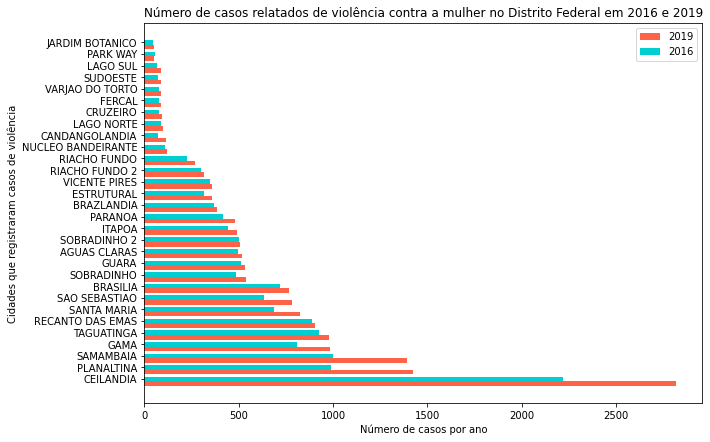

In [6]:
rotulos_mar = np.array(maria_da_penha['Unnamed: 1'][2:-1])
height = 0.4

r1 = np.arange(len(rotulos_mar))
r2 = [x + height for x in r1]

fig = plt.figure(figsize=(10,7))

plt.barh(r1, mar_2019, label = '2019', height = height, color = '#FF6347')
plt.barh(r2, mar_2016, label = '2016', height = height, color = '#00CED1')

plt.legend()
plt.xlabel("Número de casos por ano")
plt.ylabel("Cidades que registraram casos de violência")
plt.yticks([r + height for r in range(len(rotulos_mar))], rotulos_mar)
plt.title("Número de casos relatados de violência contra a mulher no Distrito Federal em 2016 e 2019")
plt.show()

#### 2.4 - Plotagem do gráfico para analisar o crescimento do número de casos durante o período de 4 anos.

Para gerar o gráfico de casos totais, foi necessário somar todos os dados armazenados dos vetor que representam cada ano.
Após a sua plotagem, é possível observar que o crescimento da curva segue o padrão de uma função quadrática.

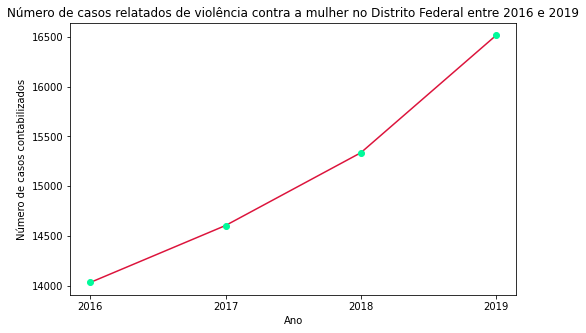

In [31]:
anos = ['2016', '2017', '2018', '2019']

soma_2016 = np.sum(mar_2016)
soma_2017 = np.sum(mar_2017)
soma_2018 = np.sum(mar_2018)
soma_2019 = np.sum(mar_2019)

soma = [soma_2016, soma_2017, soma_2018, soma_2019]

fig = plt.figure(figsize=(8,5))

plt.plot(anos, soma, color = '#DC143C')
plt.plot(anos, soma, 'o', color = '#00FA9A')

plt.xlabel("Ano")
plt.ylabel("Número de casos contabilizados")
plt.title("Número de casos relatados de violência contra a mulher no Distrito Federal entre 2016 e 2019")

plt.show()

#### 2.5 - Calcular a variação do número de casos em cada ano e estimar a média para a previsão.

Por meio do cálculo da variação percentual entre os valores no decorrer dos anos, foi possível estimar quais seriam os valores seguintes, calculando a tendência a partir da média das variações anteriores.

In [32]:
variacoes = np.zeros(3)

def variacao(VI, VF):
    variacao = (VF/VI - 1) * 100
    return variacao

variacoes[0] = variacao(soma_2016, soma_2017)
variacoes[1] = variacao(soma_2017, soma_2018)
variacoes[2] = variacao(soma_2018, soma_2019)

media = np.sum(variacoes)/3

#### 2.6 - Previsão do crescimento do número de casos para o ano de 2020 pela tendência.

Aplicando a fórmula, chegamos à um valor estimado para 2020 em torno de 17438 casos. Comparando o percentual de crescimento para 2020 com as informações fornecidas pelos agentes de comunicação, o modelo proposto no projeto não atingiu de fato o esperado (40%), porém, há muitos fatos que devem ser levados em consideração. O fato de a amostra se limitar ao Distrito Federal (há uma grande perda de informações), na base de dados utilizada, poucas informações foram explanadas, etc.

In [34]:
valor_2020 = soma_2019 * (1 + media/100)
valor_2020

17438.135375412672

#### 2.7 - Analisando a taxa de crescimento com o passar dos anos.

Apesar de tamanho crescimento a cada ano, o valor estimado para a transição do último período constatou que o número de casos, apesar de terem aumentado, tiveram uma diminuição na taxa de crescimento. Claro, vale salientar que o modelo somente dá uma estimativa, e está sucetível a erros, porém, ainda deve ser levado em consideração.

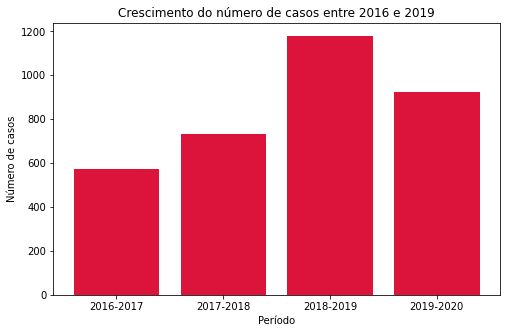

In [56]:
periodo = ['2016-2017', '2017-2018', '2018-2019', '2019-2020']
crescimento = np.zeros(4)
crescimento[0] = soma_2017-soma_2016
crescimento[1] = soma_2018-soma_2017
crescimento[2] = soma_2019-soma_2018
crescimento[3] = valor_2020-soma_2019

fig = plt.figure(figsize=(8,5))

plt.bar(periodo, crescimento, color = '#DC143C')

plt.xlabel("Período")
plt.ylabel("Número de casos")
plt.title("Crescimento do número de casos entre 2016 e 2019")
plt.show()

## Referências

ARAÚJO, M. F. **Gênero e violência contra a mulher:** o perigoso jogo de poder e dominação. SciELO, 2008. Disponível em: <http://pepsic.bvsalud.org/scielo.php?script=sci_arttext&pid=S1870-350X2008000300012>. Acesso em: 13, Agosto de 2020.

Isto É. **Violência contra a mulher aumenta em meio à pandemia:** denúncias ao 180 sobem 40%. Ed. nº 1184 14.08, 2020. Disponível em: <https://www.istoedinheiro.com.br/violencia-contra-a-mulher-aumenta-em-meio-a-pandemia-denuncias-ao-180-sobem-40/>. Acesso em: 13, Agosto de 2020.

SCHRAIBER, B. L. Et al. **A violência contra mulheres:** Demandas espontâneas e busca ativa em Unidade Básica de Saúde. SciELO, 2000. Disponível em: <https://www.scielo.br/pdf/sausoc/v9n1-2/02.pdf>. Acesso em: 13, Agosto de 2020.

SILVA, L. E. L. OLIVEIRA, M. L. C. **Violência contra a mulher:** revisão sistemática da produção científica nacional no período de 2009 a 2013. SciELO, 2015. Disponível em: <https://www.scielosp.org/article/csc/2015.v20n11/3523-3532/>. Acesso em: 13, Agosto de 2020.